https://youtu.be/t7lliJXFt8w?si=IyHcPv6PCgn1EoFi

In [1]:
import geopandas as gpd

# districts is now geopandas.GeoDataFrame type
districts = gpd.read_file(r'Shapefiles\districts.shp')
districts

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


<Axes: >

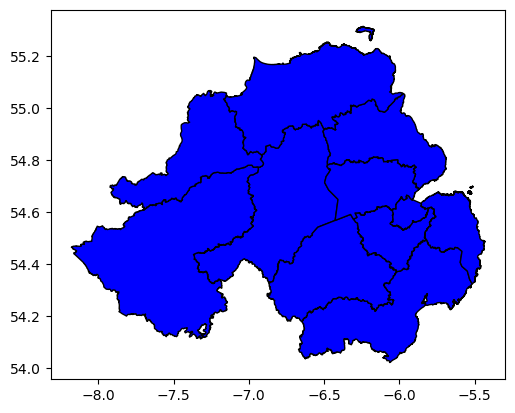

In [2]:
# geopandas plotting is based on matplotlib library
districts.plot(color='blue', edgecolor='black')

<Axes: >

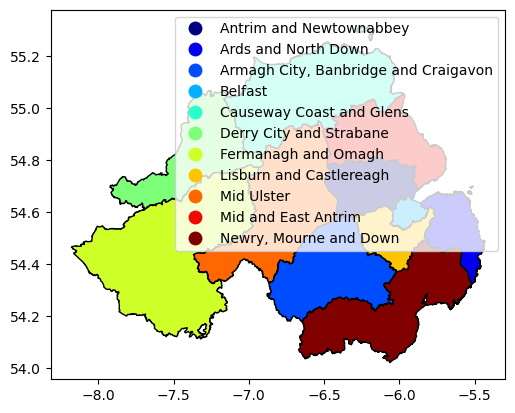

In [3]:
districts.plot(cmap='jet', edgecolor='black', column='district', legend=True)

<Axes: >

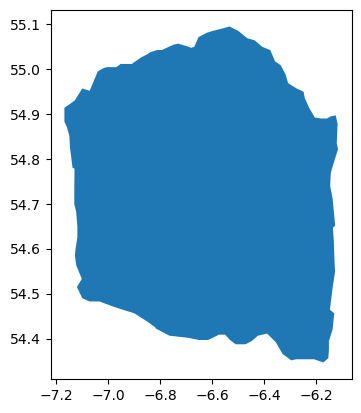

In [4]:
# area_of_interest is now geopandas.GeoDataFrame type
area_of_interest = gpd.read_file(r'Shapefiles\area_of_interest.shp')
area_of_interest.plot()

### Plot figures side by side

<Axes: >

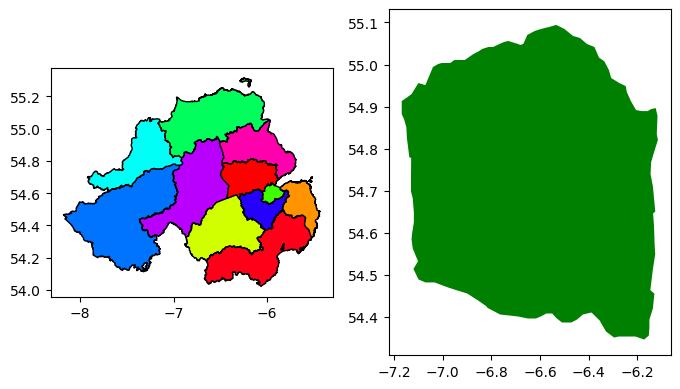

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6))
districts.plot(ax=ax1, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax=ax2, color='green')

### Plot multiple layers

<Axes: >

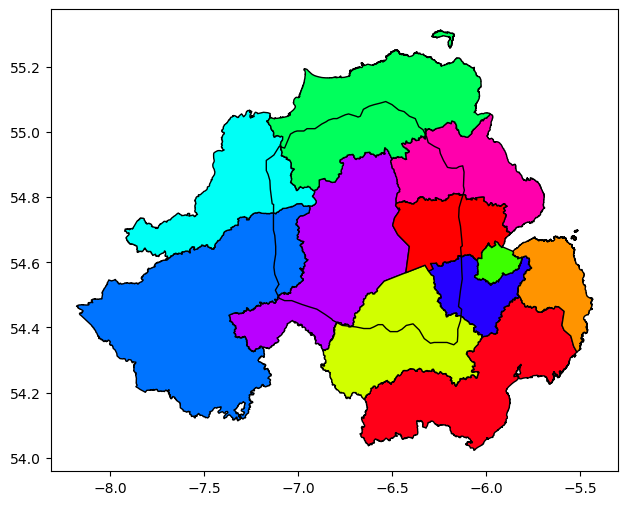

In [6]:
fig, ax = plt.subplots(figsize=(8,6))  # no arguments means 1 single plot
districts.plot(ax=ax, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax=ax, color='none', edgecolor='black')

### Add ATMs coordinates

<Axes: >

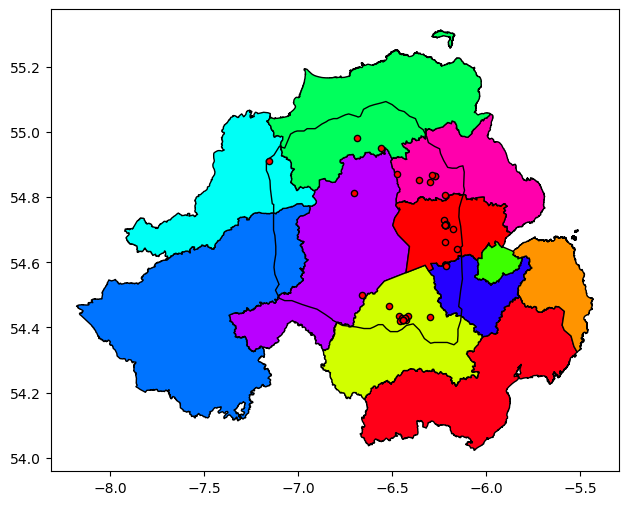

In [7]:
atms = gpd.read_file(r'Shapefiles\atms.shp')

fig, ax = plt.subplots(figsize=(8,6))  # no arguments means 1 single plot
districts.plot(ax=ax, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax=ax, color='none', edgecolor='black')
atms.plot(ax=ax, color='red', edgecolor='black', markersize=20)

### Coordinate reference system

In [8]:
print(districts.crs)
print('------------')
print(area_of_interest.crs)
print('------------')
print(atms.crs)

EPSG:4326
------------
EPSG:4326
------------
EPSG:4326


### Reprojecting on new epsg to show meters

<Axes: >

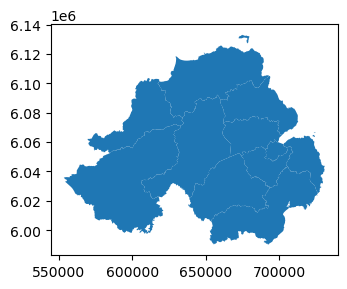

In [9]:
districts_32629 = districts.to_crs(epsg=32629) # now units in meters
districts_32629.plot(figsize=(5,3))

### Intersecting layers

<Axes: >

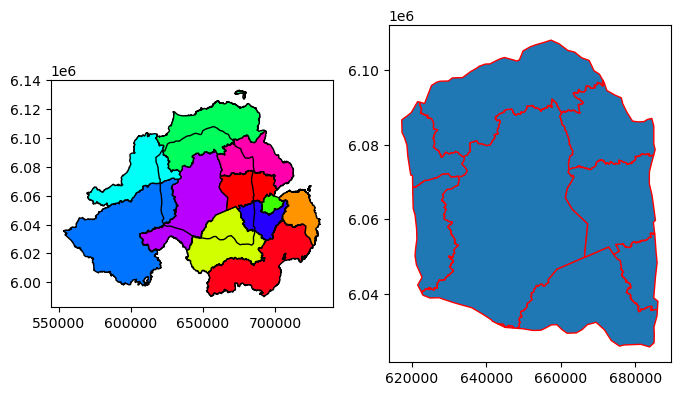

In [11]:
### Intersecting layers
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,5))  # no arguments means 1 single plot
districts_32629.plot(ax=ax1, cmap='hsv', edgecolor='black', column='district')

area_of_interest_32629 = area_of_interest.to_crs(epsg=32629)
area_of_interest_32629.plot(ax=ax1, color='none', edgecolor='black')

districts_in_aoi = gpd.overlay(districts_32629, area_of_interest_32629, how='intersection')
districts_in_aoi.plot(ax=ax2, edgecolor='red')

### Calculating the areas of intersected layers

In [12]:
districts_in_aoi['area'] = districts_in_aoi.area / 1_000_000 # to convert area to square kilometers
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",462.822918
5,Fermanagh and Omagh,0,"POLYGON ((628751.931 6072158.997, 628755.668 6...",262.996444
6,Derry City and Strabane,0,"POLYGON ((622292.384 6091383.856, 622290.858 6...",187.500979
7,Causeway Coast and Glens,0,"POLYGON ((671301.064 6097251.878, 671300.557 6...",747.580677


### Exporting GeoPandasDataframe into an ESRI Shapefile

In [13]:
districts_in_aoi.to_file('districts_within_aoi.shp', driver='ESRI Shapefile')